In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [79]:
iris = load_iris()

In [80]:
## Extracting the data from the iris dataset, and creating a DataFrame
## with the correct column names

dat= iris.data 
target= iris.target 
names= iris.target_names

irisDF = pd.DataFrame(dat, columns=iris.feature_names)
irisDF['species'] = iris.target
irisDF['species'] = irisDF['species'].replace(to_replace= [0, 1, 2], value = ['setosa', 'versicolor', 'virginica'])

In [81]:

irisDF 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [82]:
## Verifying the datatypes of the dataframe attributes
irisDF.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species               object
dtype: object

# Part 1

In [83]:
irisDF.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Text(0.5, 1.0, 'Petal Widths')

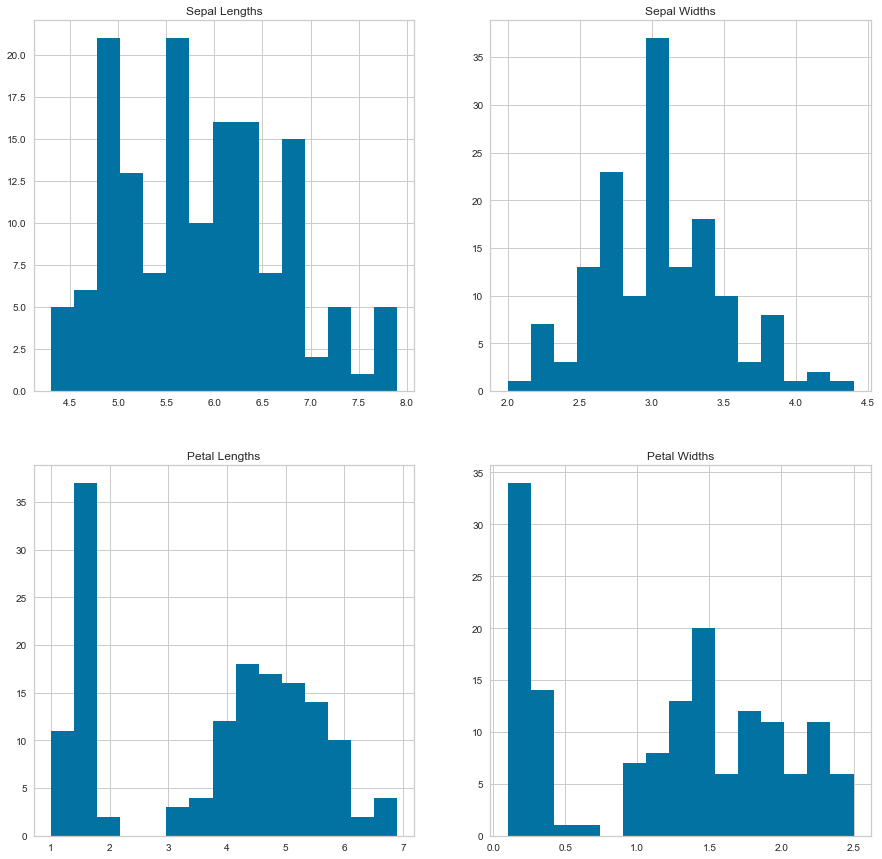

In [84]:
## Distribution histograms of all four features

plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.hist(irisDF['sepal length (cm)'], bins = 15)
plt.title('Sepal Lengths')

plt.subplot(2,2,2)
plt.hist(irisDF['sepal width (cm)'], bins = 15)
plt.title('Sepal Widths')

plt.subplot(2,2,3)
plt.hist(irisDF['petal length (cm)'], bins = 15)
plt.title('Petal Lengths')

plt.subplot(2,2,4)
plt.hist(irisDF['petal width (cm)'], bins = 15)
plt.title('Petal Widths')

The visualization and the descriptions generated above show the distributions of all four features of the iris: sepal length and width and petal length and width... Exact numbers are generated in the description table above.

Text(0, 0.5, 'Sepal Width (cm)')

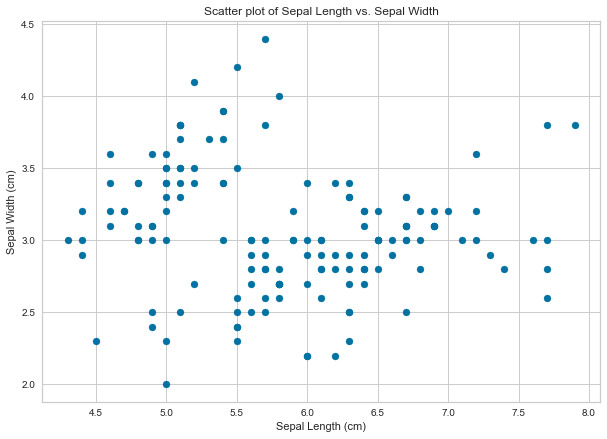

In [85]:
## 2D scatter plot

plt.figure(figsize=(10,7))
plt.scatter(irisDF['sepal length (cm)'], irisDF['sepal width (cm)'])
plt.title('Scatter plot of Sepal Length vs. Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

Text(0.5, 0, 'Sepal Width (cm)')

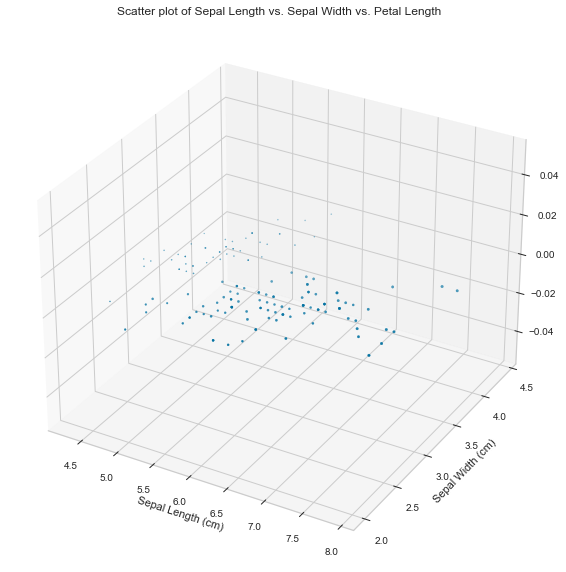

In [86]:
## 3D Scatter plot

plt.figure(figsize=(10,10)).add_subplot(projection='3d')
plt.scatter(irisDF['sepal length (cm)'], irisDF['sepal width (cm)'], irisDF['petal length (cm)'])
plt.title('Scatter plot of Sepal Length vs. Sepal Width vs. Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

In [87]:
## calculating dot product of sepal length x sepal width
np.dot(irisDF['sepal length (cm)'], irisDF['sepal width (cm)'])

2673.4299999999994

In [88]:
## Calculating the norm of the sepal length vector
np.linalg.norm(irisDF['sepal length (cm)'])

72.27620631992247

In [89]:
## Calculating the distance between sepal length and sepal width
## distance from v1 to v2 = ||v1-v2||

np.linalg.norm(irisDF['sepal length (cm)'] - irisDF['sepal width (cm)'])

36.157848387314196

# Part 2

In [90]:
import scipy
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer ## New library can be found at (https://pypi.org/project/yellowbrick/#files)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.cluster.vq import whiten

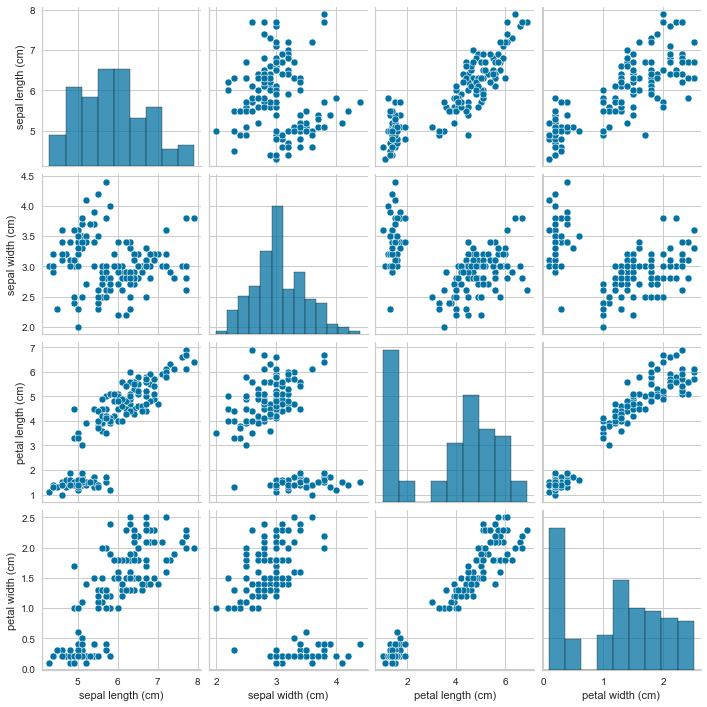

In [91]:
## Pairplot of the Iris dataset
sns.pairplot(irisDF)
plt.show()

C:\Users\osama\AppData\Local\Programs\PythonCodingPack\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


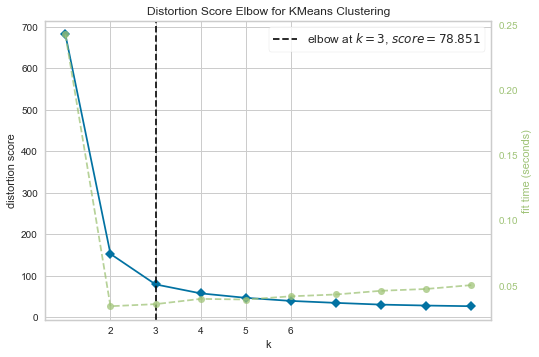

In [92]:
## Making an elbow plot to determine the best number of clusters for the set
irisVals = irisDF.iloc[:, [0,1,2,3]].values

fig, ax = plt.subplots()

visualizer = KElbowVisualizer(KMeans(), k=(1,11),ax=ax)
visualizer.fit(irisVals)

ax.set_xticks(range(2,7))
visualizer.show()
plt.show()


Best number of clusters is 3 accodring to the elbow graph.

In [93]:
## DataFrame Reduction - Principal Component Analysis
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(irisVals)) #scaling the data
scaled_data

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


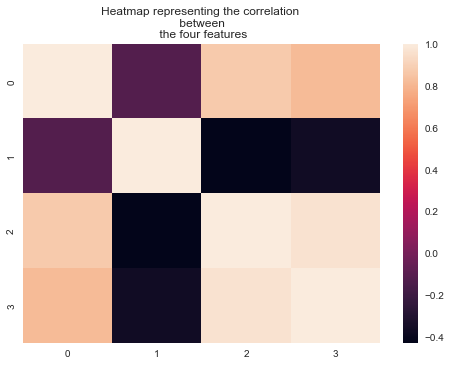

In [94]:
sns.heatmap(scaled_data.corr())
plt.title('Heatmap representing the correlation \n between \n the four features')
plt.show()

In [95]:
## Producing a PCA reduced dataset

pca = PCA(n_components = 3)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3'])
data_pca

,PC1,PC2,PC3
0,-2.264703,0.480027,-0.127706
1,-2.080961,-0.674134,-0.234609
2,-2.364229,-0.341908,0.044201
3,-2.299384,-0.597395,0.091290
4,-2.389842,0.646835,0.015738
...,...,...,...
145,1.870503,0.386966,0.256274
146,1.564580,-0.896687,-0.026371
147,1.521170,0.269069,0.180178
148,1.372788,1.011254,0.933395


In [96]:
finalDf = pd.concat([data_pca, irisDF[['species']]], axis = 1)


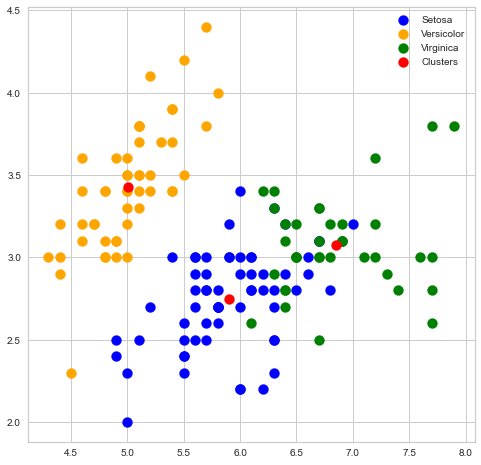

In [97]:
## A clustering of the original dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)  
y_kmeans = kmeans.fit_predict(irisVals)

plt.figure(figsize = (8,8))
plt.scatter(irisVals[y_kmeans == 0, 0], irisVals[y_kmeans == 0,1], s = 100, c = 'blue', label = 'Setosa')
plt.scatter(irisVals[y_kmeans == 1, 0], irisVals[y_kmeans == 1,1], s = 100, c = 'orange', label = 'Versicolor')
plt.scatter(irisVals[y_kmeans == 2, 0], irisVals[y_kmeans == 2,1], s = 100, c = 'green', label = 'Virginica')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Clusters')

plt.legend()

plt.show()

In [98]:
irisPCAVals = data_pca.iloc[:, [0,1,2]].values


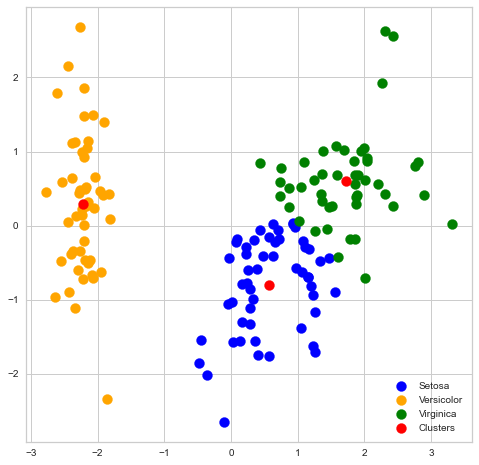

In [99]:
## A clustering of the PCA reduced dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)  
y_kmeans = kmeans.fit_predict(irisPCAVals)

plt.figure(figsize = (8,8))
plt.scatter(irisPCAVals[y_kmeans == 0, 0], irisPCAVals[y_kmeans == 0,1], s = 100, c = 'blue', label = 'Setosa')
plt.scatter(irisPCAVals[y_kmeans == 1, 0], irisPCAVals[y_kmeans == 1,1], s = 100, c = 'orange', label = 'Versicolor')
plt.scatter(irisPCAVals[y_kmeans == 2, 0], irisPCAVals[y_kmeans == 2,1], s = 100, c = 'green', label = 'Virginica')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Clusters')

plt.legend()


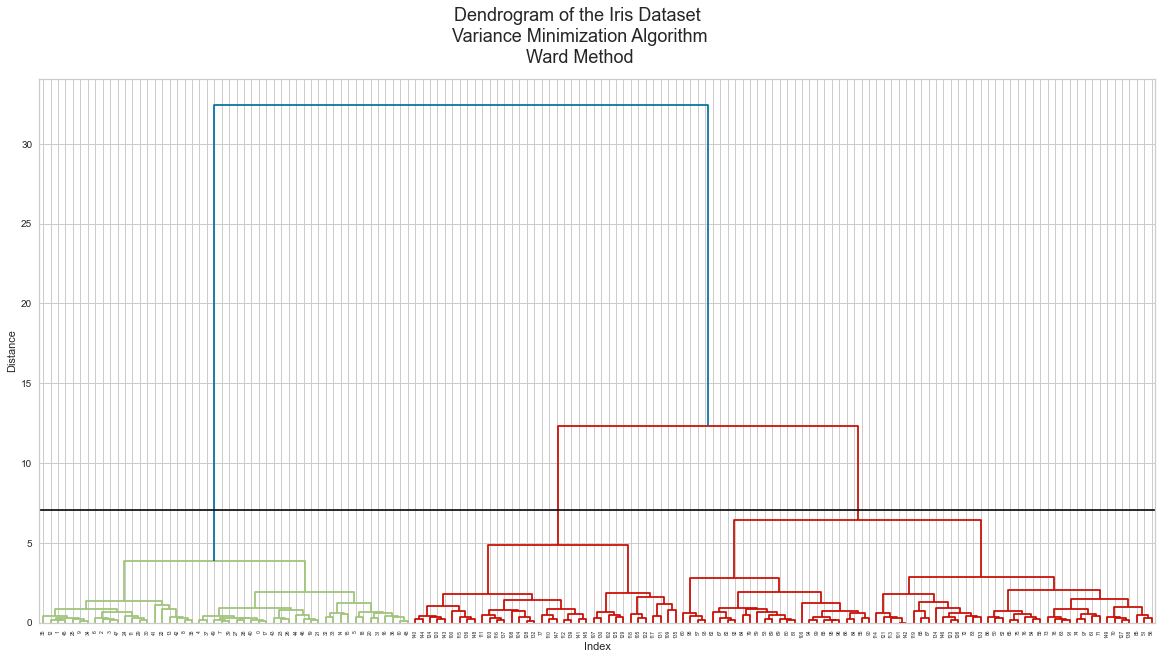

In [100]:
dist_sin = linkage(irisDF.loc[:,['sepal length (cm)', 'sepal width (cm)',
                                 'petal length (cm)', 'petal width (cm)']], method="ward")

plt.figure(figsize=(20,10))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram of the Iris Dataset \n Variance Minimization Algorithm \n Ward Method ",fontsize=18)
plt.axhline(y=7.08, c='k') 
plt.show()

In [102]:
df = pd.DataFrame(iris['data'])
print(df.head())
scaled_data = whiten(df.to_numpy())
df['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


## Conclusion

A conclusion can be drawn from the visualizations that three clusters are the best fit for the dataset. <br>
The principal component analysis (PCA) was performed and reduced the original dataset. <br>
The clustering from the reduced dataset was clearer and distinguished between the three clusters better than the clustering using the full dataset. <br>
<br>
The PCA sure did improve the clustering results, since it reduced the features and used that instead of the projections of the full features.